In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
file_path = r"C:\Users\Admin\Downloads\superstore.xlsx"
data = pd.read_excel(file_path)

data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,44256,44378,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,44287,44409,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,44317,44531,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
data.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Country/Region     object
City               object
State/Province     object
Postal Code        object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 21)


In [ ]:
#find duplicate values
data.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for missing values
print(data.isnull().sum())

# Fill missing values with appropriate strategies
data.fillna({'Postal Code': data['Postal Code'].mode()[0]}, inplace=True)

#Interpretation:
Identifies missing values and fills them using the mode for categorical data.


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64


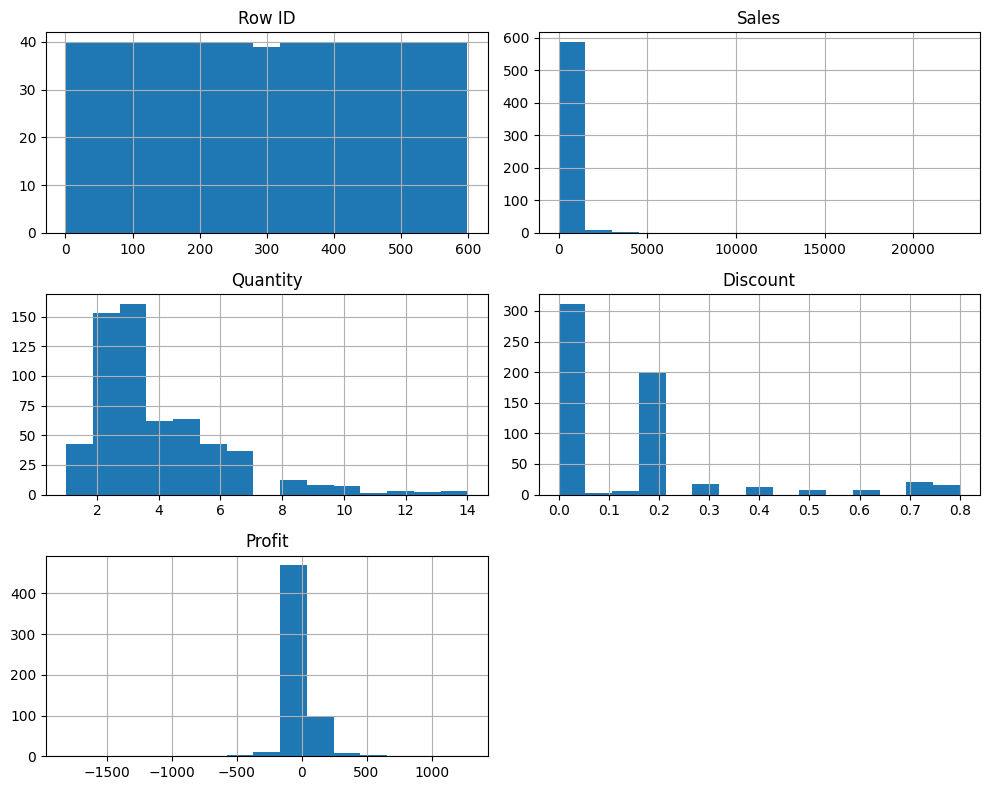

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols].hist(figsize=(10, 8), bins=15)
plt.tight_layout()
plt.show()

#Interpretation:
The code selects numeric columns from the dataset using select_dtypes with
float64 and int64 data types. The hist method generates histograms for each
numeric variable, showing their frequency distribution across defined bins
(15 in this case). The figsize=(10, 8) ensures the plots are large enough
for clear visibility, while plt.tight_layout() adjusts spacing to prevent
overlapping of elements. Finally, plt.show() displays the histograms,
making it easy to analyze the spread, skewness, and central tendencies of
variables like Sales, Profit, and Quantity

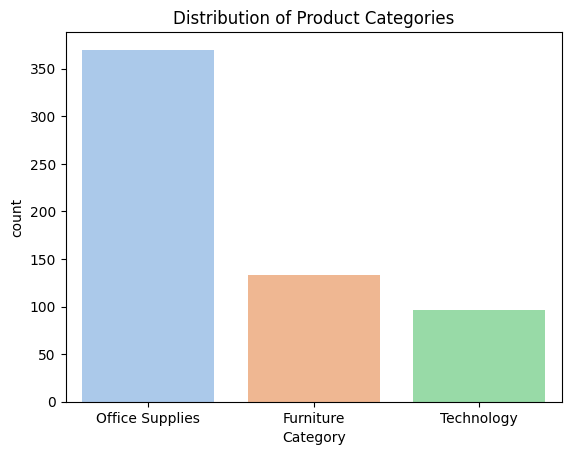

In [ ]:
sns.countplot(data=data, x='Category', hue='Category', palette='pastel', legend=False)
plt.title('Distribution of Product Categories')
plt.show()

#Interpretation
he sns.countplot function is used to display the distribution of the Category column,
showing the count of each product category in the dataset. The palette='pastel' applies
a light color scheme, enhancing the visual appeal of the chart. Adding a title using
plt.title() ensures the plot is self-explanatory and clearly represents its purpose.
Finally, plt.show() renders the plot, making it easy to observe the frequency of each product category.


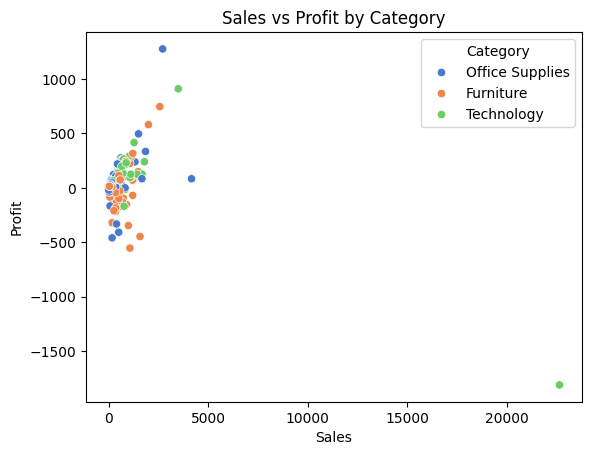

In [ ]:
sns.scatterplot(data=data, x='Sales', y='Profit', hue='Category', palette='muted')
plt.title('Sales vs Profit by Category')
plt.show()

#Interpretation
The sns.scatterplot function creates a scatterplot to visualize the relationship
between Sales (x-axis) and Profit (y-axis) across different data points.
The hue ='Category'parameter adds a color distinction for each product category
,helping identify trends or patterns unique to categories like Office Supplies,
Technology, and Furniture. The palette='muted' provides a soft and visually
distinct color scheme, making the plot easy to interpret. Adding a title with
plt.title() gives context to the chart, and plt.show() renders the visualization,
allowing insights into how sales and profits vary by category.


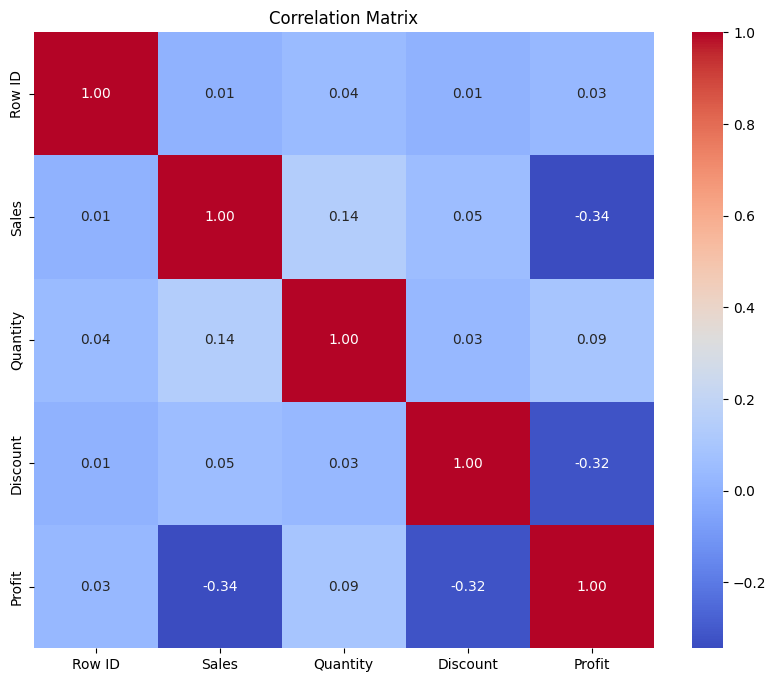

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Interpretation
The code begins by selecting only the numeric columns from the dataset using select_dtypes(include=['float64', 'int64']),
ensuring that only valid data types are used for the correlation calculation. The numeric_data.corr() function computes
the pairwise correlation between the numeric columns, generating a matrix of
correlation coefficients. The sns.heatmap visualizes this matrix with color intensity indicating the strength and direction
of correlations, where annot=True displays the numerical values directly on the plot, and cmap='coolwarm' uses a gradient
color scheme for clarity. The title, added with plt.title(), and plt.show() render the chart, making it easier to interpret
relationships among numeric variables visually.

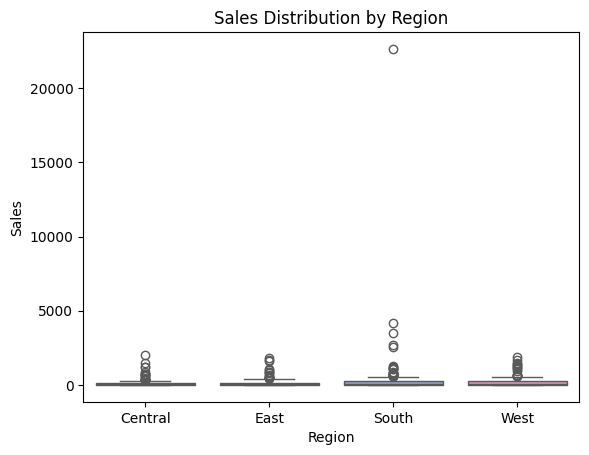

In [ ]:
sns.boxplot(data=data, x='Region', y='Sales', hue='Region', palette='Set2', legend=False)
plt.title('Sales Distribution by Region')
plt.show()

#Interpretation
The code generates a boxplot to visualize the distribution of Sales across different Region categories in the dataset.
The palette='Set2' applies a predefined color scheme, ensuring distinct colors for each region, making the plot visually
appealing. The boxplot shows the median, quartiles, and potential outliers for Sales in each Region, allowing for easy
comparison of sales performance across regions. The title, set with plt.title(), clarifies the purpose of the plot,
and plt.show() displays the chart, helping in interpreting regional sales distributions.


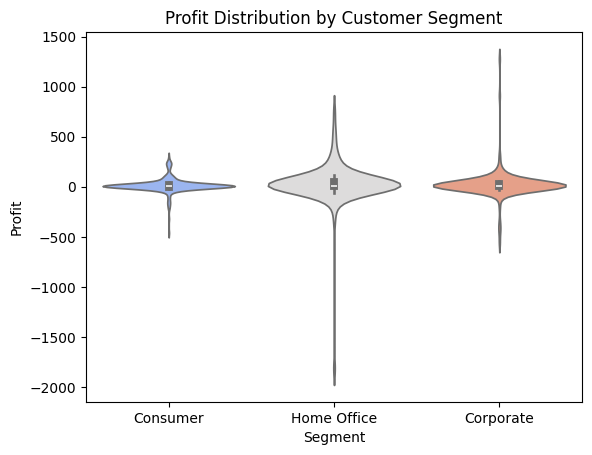

In [ ]:
sns.violinplot(data=data, x='Segment', y='Profit', hue='Segment', palette='coolwarm', legend=False)
plt.title('Profit Distribution by Customer Segment')
plt.show()

#Interpretations
he sns.violinplot visualizes the distribution of Profit across different Segment categories,
with each segment represented as a distinct "violin" shape. The hue='Segment' ensures that each segment is
assigned a different color using the palette='coolwarm', which creates a gradient from cool to warm colors.
The width of each violin at different profit values represents the density of data points, providing insights
into the distribution, spread, and central tendency of profits within each segment. Finally, plt.title()
adds a title to the plot, and plt.show() displays the visualization, allowing easy comparison of profit distributions across segments.

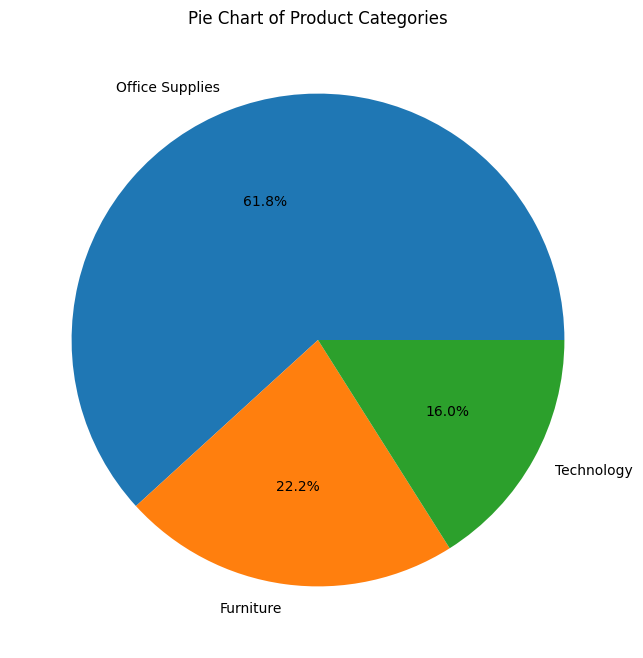

In [ ]:
# Pie chart for a specific column (e.g., 'Category' column)
plt.figure(figsize=(8, 8))
plt.pie(data['Category'].value_counts(), labels=data['Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Pie Chart of Product Categories')
plt.show()

#Interpretations
The pie chart provides a clear visual representation of the distribution of product categories within the dataset.
Each slice of the pie corresponds to a product category, with the size of the slice proportional to the frequency of each category.
The percentage values on each slice indicate the proportion of each category relative to the total number of products.
This chart helps in quickly understanding the relative importance or dominance of each product category in the dataset.

In [ ]:
Scatter Plot of Duration vs Number of Critic Reviews by Color:
Similarly, this scatter plot visualizes the relationship between movie duration and
the number of critic reviews, but this time with a different set of columns or a different dataset.
By comparing this plot with the first one, we can assess whether the relationship between duration,
critic reviews, and color remains consistent across different datasets or columns.

In [ ]:
# Check column names in the dataset
print(data.columns)


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


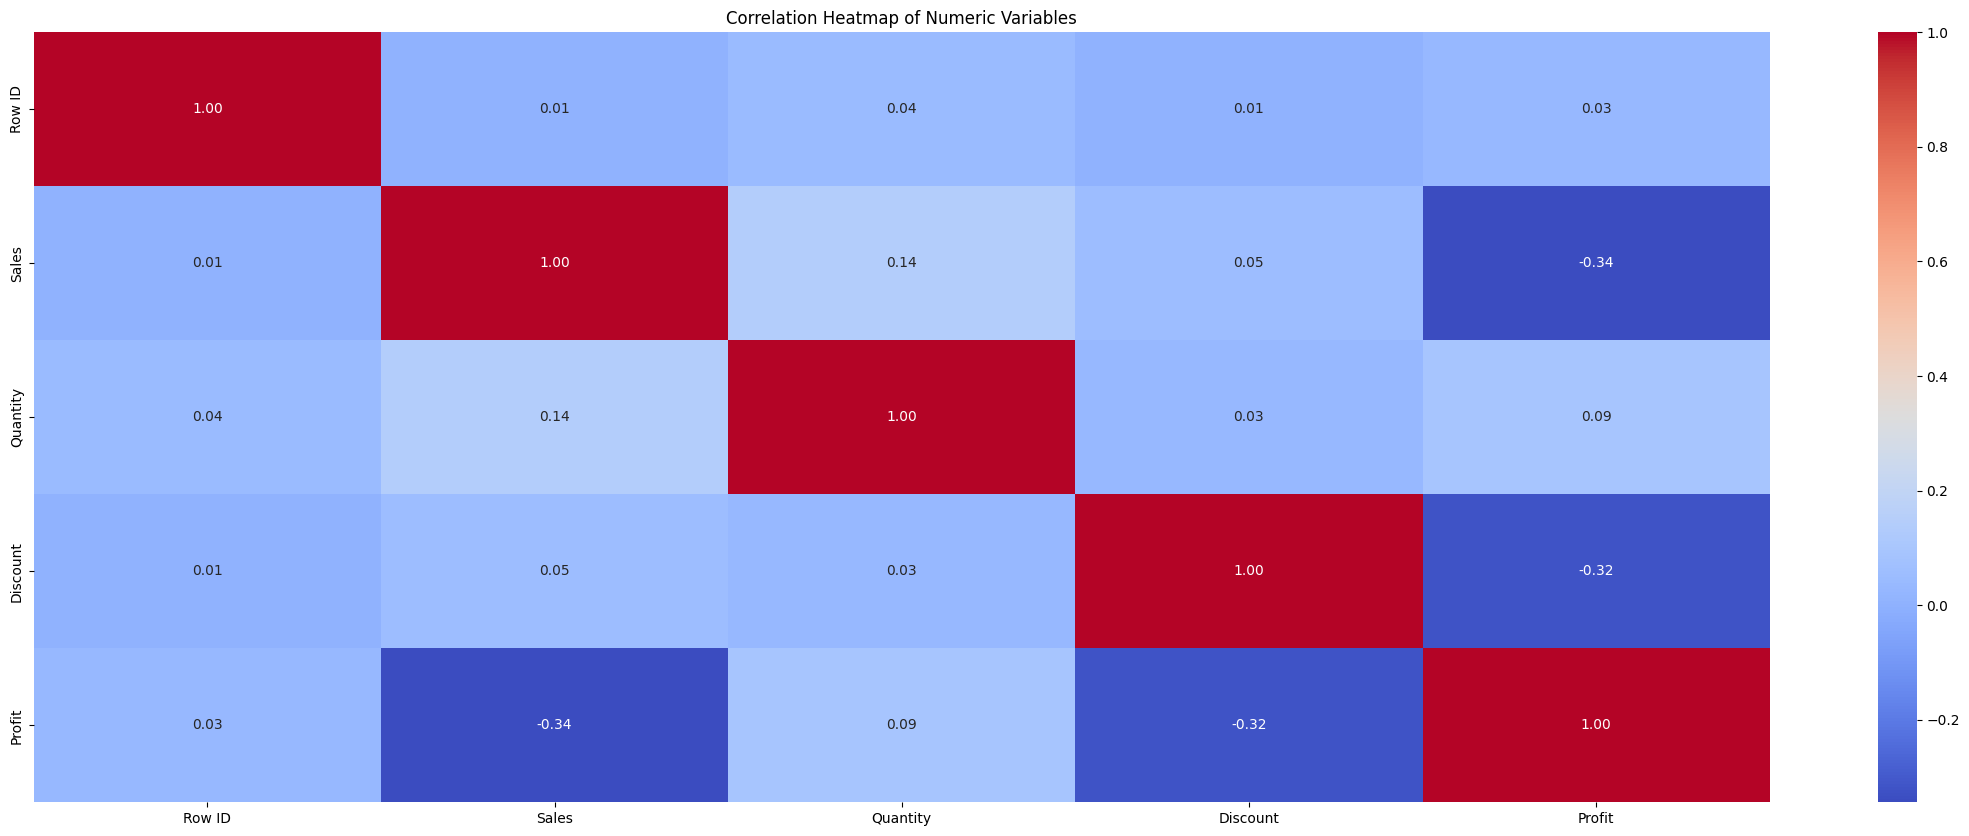

In [ ]:
# Select numeric columns from the dataset
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap for correlations between numeric variables
plt.figure(figsize=(28, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#Interpretations
Correlation Matrix: The heatmap visualizes the correlation between numeric variables like Sales, Profit, Quantity, etc.
Color Representation: The color intensity (from red to blue) shows the strength and direction of the correlation (positive or negative).
Annotations: Correlation coefficients are displayed on the heatmap, quantifying the relationships (ranges from -1 to 1).
This plot helps identify variables that are highly correlated (e.g., Sales and Profit), which could guide further analysis and feature engineering.